### In questo Notebook attuiamo alcune elaborazioni sui dati ANKI letti direttamente dalla tabella MYSQL

In [1]:
import mysql.connector as sql
import pandas as pd

db_connection = sql.connect(host='52.208.150.140', database='home1', user='anki', password='welcome1')

In [2]:
df = pd.read_sql('SELECT * FROM laps', con=db_connection)

In [3]:
df

,raceId,carName,lap,lapTime
0,256,Skull,1,21285
1,256,Ground Shock,1,20228
2,256,Thermo,1,19175
3,256,Skull,2,7546
4,256,Ground Shock,2,7360
5,256,Thermo,2,9785
6,256,Ground Shock,3,7219
7,256,Skull,3,9432
8,256,Thermo,3,11828
9,256,Ground Shock,4,8300


In [4]:
# identifica l'ultima corsa svolta
lastRace = df['raceId'].max()

In [5]:
# seleziona i dati dell'ultima corsa nel dataframe dfLast
dfLast = df.loc[df['raceId'] == lastRace]

In [6]:
# identifica le auto che hanno partecipato
cars = dfLast['carName'].unique()

In [7]:
# fa il il plot dei tempi per lap
import matplotlib, matplotlib.pyplot as plt

for car in cars:
    xp = dfLast.loc[df['carName'] == car]['lap']
    yp = dfLast.loc[df['carName'] == car]['lapTime']
    plt.plot(xp, yp, "-o")

plt.xlabel("lap")
plt.ylabel("time (msec)")
plt.title("Lap times")
plt.legend(cars)

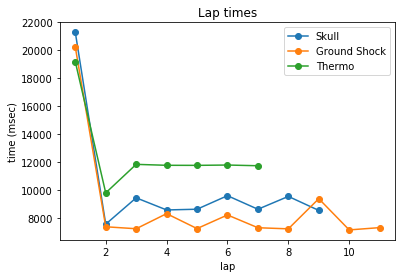

In [8]:
plt.show()

In [9]:
dfSpeed = pd.read_sql('SELECT * FROM speed', con=db_connection)

In [10]:
carsSpeed = dfSpeed['carName'].unique()

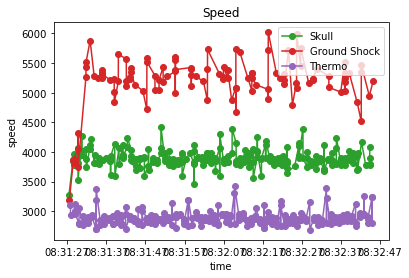

In [23]:
for car in carsSpeed:
    xp = pd.to_datetime(dfSpeed.loc[dfSpeed['carName'] == car]['dTimeString'])
    yp = dfSpeed.loc[dfSpeed['carName'] == car]['speed']
    plt.plot(xp, yp, "-o")

plt.xlabel("time")
plt.ylabel("speed")
plt.title("Speed")
plt.legend(cars)
plt.show()